### Exercise 3.3

We consider the following integral:
$$
I = \int_{0}^{1} (1 - x^2)^{1/2} \, dx.
$$

Take the sampling distribution to be uniform on \([0,1]\).
Build the Monte Carlo estimate for varying \(N\) and compute the mean and the variance.

That is, for
$$
\phi(x) = (1 - x^2)^{1/2},
$$
and given samples $(X_1, \ldots, X_N) \sim \mathrm{Unif}(0,1)$, compute
$$
\hat{\phi}_N
= \frac{1}{N} \sum_{i=1}^{N} \phi(X_i).
$$

and the empirical variance

$$\widehat{var}[\hat{\phi}_N]
= \frac{1}{N^2}
\sum_{i=1}^{N}
\left( \phi(X_i) - \hat{\phi}_N \right)^2.$$



In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np
rng = np.random.default_rng(108)

In [2]:
def phi(x):
    return np.sqrt(1-x**2)

def phi_hat(x, N):
    return 1/N * phi(x).sum()

def var_hat(x, N):
    var = (phi(x) - phi_hat(x, N))**2
    return 1/(N**2) * var.sum()

In [3]:
# Compute exact value of the integral
I, err = quad(phi, 0, 1)
print(I)

0.7853981633974481


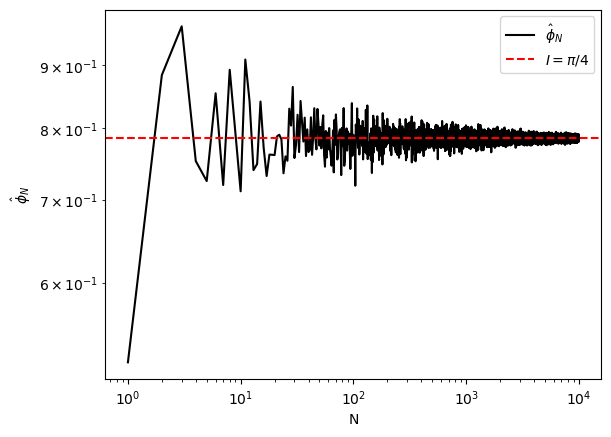

In [4]:
Ns = np.arange(1, 10000, 1)

phis = []
stds = []

for n in Ns:
    x = rng.uniform(0, 1, n)

    phi_n = phi_hat(x, n)
    var_phi = var_hat(x, n)

    phis.append(phi_n)
    stds.append(np.sqrt(var_phi / n))

phis = np.array(phis)
stds = np.array(stds)

plt.figure()

plt.loglog(Ns, phis, color="black", linewidth=1.5, label=r"$\hat{\phi}_N$")
plt.axhline(I, linestyle="--", color="red", label=r"$I = \pi/4$")

plt.xlabel("N")
plt.ylabel(r"$\hat{\phi}_N$")
plt.legend()
plt.show()

